In [0]:
!pip install ripe.atlas.sagan[fast,doc] -qq
!pip install ripe.atlas.cousteau -qq

In [0]:
ATLAS_API_KEY = "80d46b09-8cf1-4a43-a90a-e2edf9fc974d"

In [0]:
from ripe.atlas.cousteau import 

SyntaxError: ignored

In [45]:
### Get results from RIPE
### Doc: https://github.com/RIPE-NCC/ripe-atlas-cousteau
from ripe.atlas.cousteau import AtlasStream, Probe 


PING_RESULTS = []

def on_result_response(*args):
    """
    Function that will be called every time we receive a new result.
    Args is a tuple, so you should use args[0] to access the real message.
    """
    #print(args)
    PING_RESULTS.append(args[0])
atlas_stream = AtlasStream()
atlas_stream.connect()
# Measurement results
channel = "atlas_result"
# Bind function we want to run with every result message received
atlas_stream.bind_channel(channel, on_result_response)
# Subscribe to new stream for 1001 measurement results
stream_parameters = {"msm": 1001}
atlas_stream.start_stream(stream_type="result", **stream_parameters)

# Probe's connection status results
channel = "atlas_probestatus"
atlas_stream.bind_channel(channel, on_result_response)
stream_parameters = {"enrichProbe+": True}
atlas_stream.start_stream(stream_type="probestatus", **stream_parameters)

# Timeout all subscriptions after 5 secs. Leave seconds empty for no timeout.
# Make sure you have this line after you start *all* your streams
atlas_stream.timeout(seconds=120)
# Shut down everything
atlas_stream.disconnect()

"enrichProbe+" is not a valid parameter


In [185]:
c = Probe(id =24944)  # get the informatiom from the Prob 24944
d =Probe(id=30392)# get the information from the Prob 30392
e =Probe(id=10843)# get the Imformatin from the Prob 4980

probeId ={}
# loop throught the disctionary and apprend the result to an array 
for loopProbe in PING_RESULTS[:20]:
  pirb_id = loopProbe['prb_id']
  if pirb_id in probeId:
    continue
  probeId[pirb_id]=Probe(id=loopProbe['prb_id'])
  print(probeId)




 

{10843: Probe #10843}
{10843: Probe #10843, 25712: Probe #25712}
{10843: Probe #10843, 25712: Probe #25712, 24244: Probe #24244}
{10843: Probe #10843, 25712: Probe #25712, 24244: Probe #24244, 31005: Probe #31005}
{10843: Probe #10843, 25712: Probe #25712, 24244: Probe #24244, 31005: Probe #31005, 33399: Probe #33399}
{10843: Probe #10843, 25712: Probe #25712, 24244: Probe #24244, 31005: Probe #31005, 33399: Probe #33399, 31452: Probe #31452}
{10843: Probe #10843, 25712: Probe #25712, 24244: Probe #24244, 31005: Probe #31005, 33399: Probe #33399, 31452: Probe #31452, 15233: Probe #15233}
{10843: Probe #10843, 25712: Probe #25712, 24244: Probe #24244, 31005: Probe #31005, 33399: Probe #33399, 31452: Probe #31452, 15233: Probe #15233, 34674: Probe #34674}
{10843: Probe #10843, 25712: Probe #25712, 24244: Probe #24244, 31005: Probe #31005, 33399: Probe #33399, 31452: Probe #31452, 15233: Probe #15233, 34674: Probe #34674, 518: Probe #518}
{10843: Probe #10843, 25712: Probe #25712, 24244: 

In [181]:

latitude =[]
long =[]
for probe, probeObject in probeId.items():
  latitude.append( probeObject.meta_data['geometry']['coordinates'][0])
  long.append(probeObject.meta_data['geometry']['coordinates'][1])
print(latitude)
print(long)








[32.5795, 16.4075, 65.2695, 13.4575, 5.0415, 33.3895, 8.2885, 10.1205, 5.3875, -3.6485]
[0.3085, 48.2485, 55.4195, 52.5095, 51.7015, 35.1885, 47.0485, 56.1695, 43.2815, 40.5585]


In [0]:
#First locatiom of the probe
latitude1 =c.meta_data['geometry']['coordinates'][0] #store the latitude in the variable 
long1 = c.meta_data['geometry']['coordinates'][1]    #store the long in the variable
#Seconde location of  the probe
latitude2=d.meta_data['geometry']['coordinates'][0]
long2=d.meta_data['geometry']['coordinates'][1]
#Third location of probes 
latitude3 =e.meta_data['geometry']['coordinates'][0]
long3 = e.meta_data['geometry']['coordinates'][1]




In [0]:
# class Dog:
#     A = 2
#     def __init__(self):
#         self.b=3

# print(Dog.A)
# # print(Dog.b)
# Richard = Dog()
# print(Richard.b)
# Alice = Dog()
# print(Alice.c)
# Dog.c = 5

isinstance(int(), int)

True

In [0]:
" ".join("hello")

'h e l l o'

In [0]:
print("hello")

hello


In [0]:
import networkx as nx 
G = nx.Graph()


In [108]:
PING_RESULTS[0]

{'af': 4,
 'avg': 131.1030083333,
 'dst_addr': '193.0.14.129',
 'dst_name': '193.0.14.129',
 'dup': 0,
 'from': '41.220.0.39',
 'fw': 4980,
 'lts': 59,
 'max': 163.56996,
 'min': 78.751315,
 'msm_id': 1001,
 'msm_name': 'Ping',
 'prb_id': 10843,
 'proto': 'ICMP',
 'rcvd': 3,
 'result': [{'rtt': 163.56996}, {'rtt': 78.751315}, {'rtt': 150.98775}],
 'sent': 3,
 'size': 20,
 'src_addr': '192.168.200.175',
 'step': 240,
 'timestamp': 1580411710,
 'ttl': 54,
 'type': 'ping'}

In [0]:
### Example plot of RIPE data.
# Doc: https://networkx.github.io/documentation
###

import networkx as nx 

G = nx.Graph()

# Iterate over results.
for result in PING_RESULTS[:20]:
    # Get source and destination.
    source = result.get("from") # Returns value of key 'src_addr' if it exists. If not, returns `None`.

    # Skip result if it has no from.
    if source is None:
        continue

    destination = result["dst_addr"]

    # Get average rtt. Skip this result if the rtt is negative.
    avg_rtt = result.get("avg", -1)
    if avg_rtt < 0:
        continue

    # Add edge to our graph.
    G.add_edge(source, destination, weight=avg_rtt, hello=2*avg_rtt)

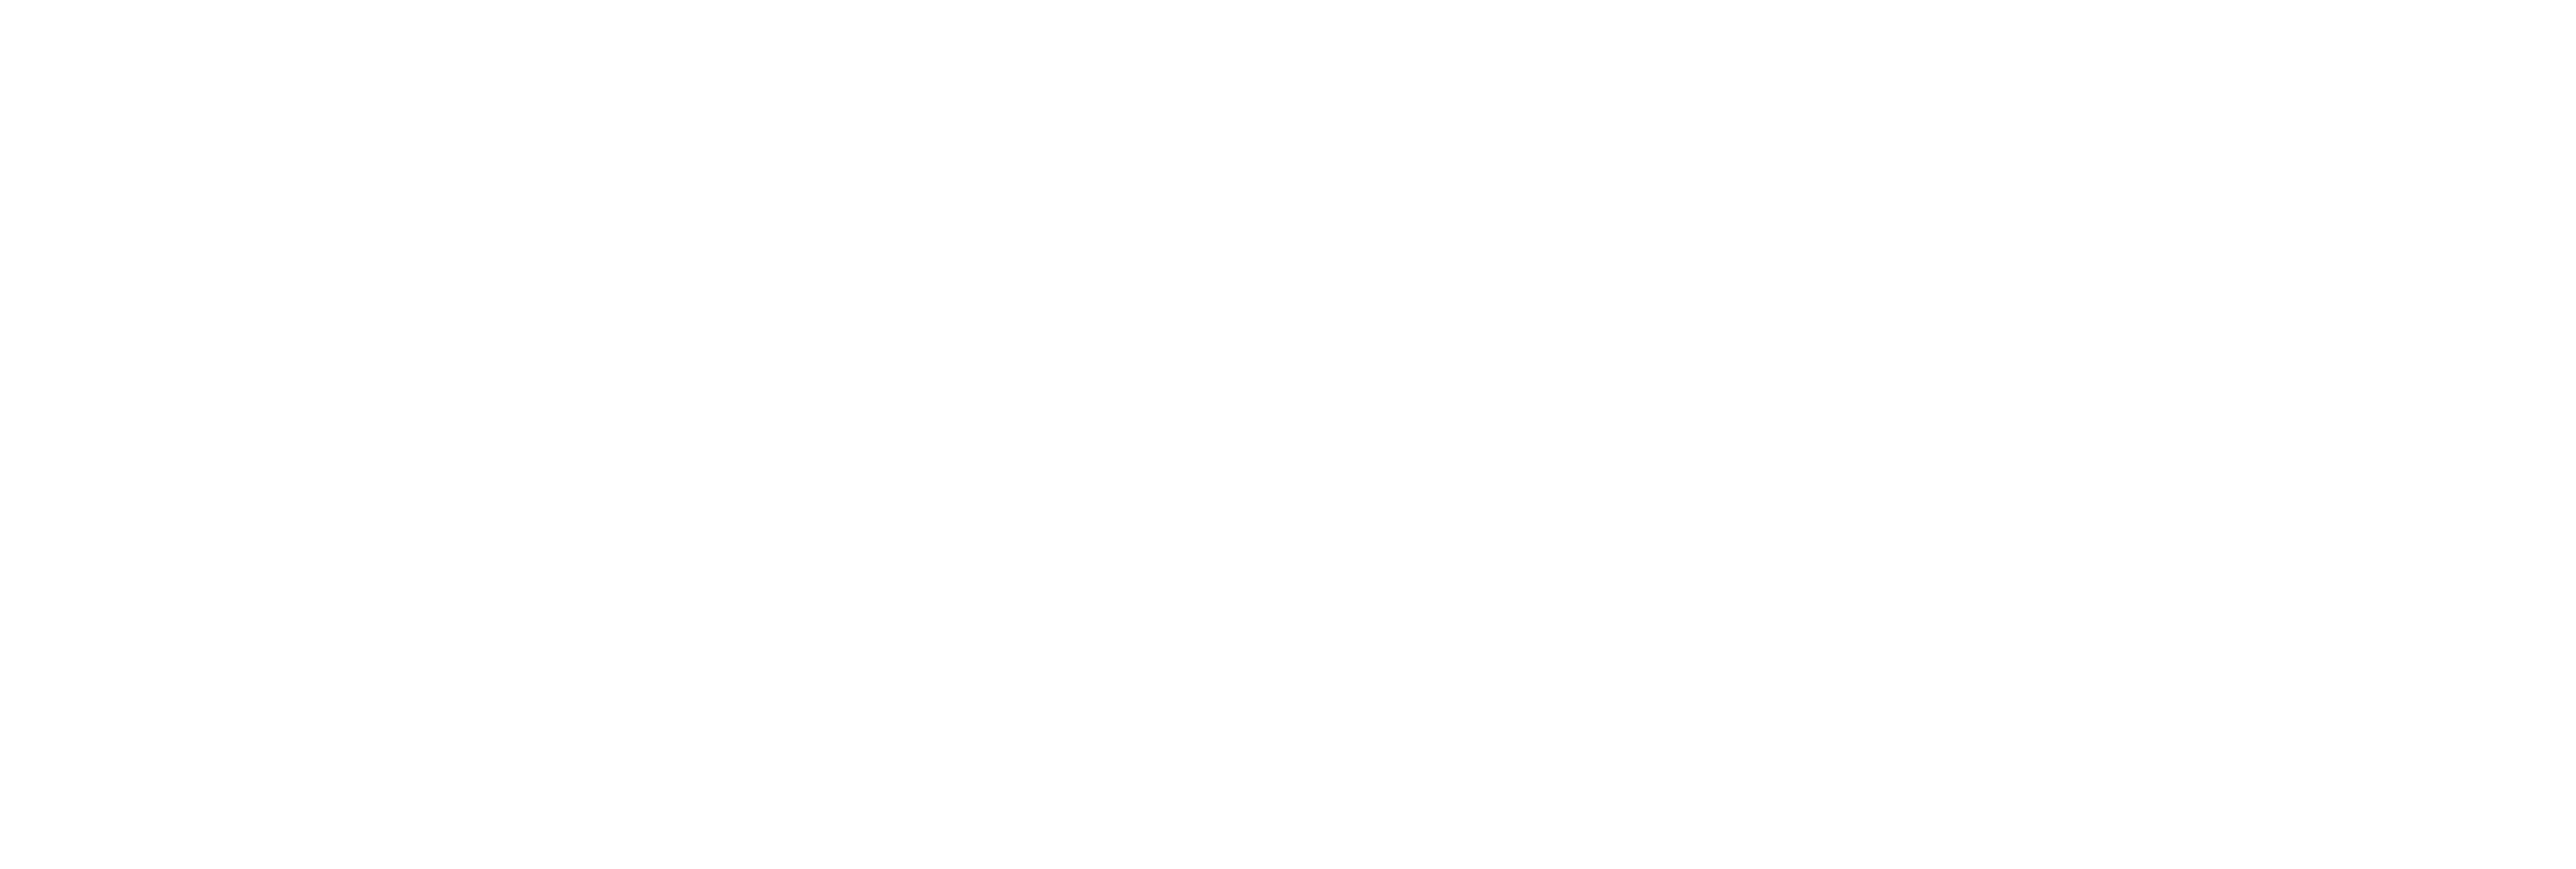

In [0]:
# Plot the graph.

import matplotlib.pyplot as plt

pos = nx.spring_layout(G) # Set graph layout.
plt.figure(1, figsize=(30, 10), dpi=100) # Set the matplotlib canvas size.
nx.draw(G, pos, node_size=60,font_size=8, with_labels=True) # Draw the NetworkX graph, setting the layout ('pos'), node size and font size.

# Draw edge weights.
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show() # Render the plot.

In [0]:
# Get edges with data.
G.edges(data=True)

EdgeDataView([('79.142.233.18', '193.0.14.129', {'weight': 17.1742756667, 'hello': 34.3485513334}), ('193.0.14.129', '185.197.132.68', {'weight': 43.0774733333, 'hello': 86.1549466666}), ('193.0.14.129', '88.133.233.190', {'weight': 10.1371116667, 'hello': 20.2742233334}), ('193.0.14.129', '109.88.106.200', {'weight': 15.810805, 'hello': 31.62161}), ('193.0.14.129', '84.9.178.136', {'weight': 24.084225, 'hello': 48.16845}), ('193.0.14.129', '89.128.173.57', {'weight': 36.9456386667, 'hello': 73.8912773334}), ('193.0.14.129', '23.28.29.53', {'weight': 54.090861, 'hello': 108.181722}), ('193.0.14.129', '188.118.149.135', {'weight': 27.08148, 'hello': 54.16296}), ('193.0.14.129', '185.54.168.245', {'weight': 40.794865, 'hello': 81.58973}), ('193.0.14.129', '185.183.114.241', {'weight': 1.4656393333, 'hello': 2.9312786666})])

In [0]:
# Get nodes with data.
G.nodes(data=True)

NodeDataView({'79.142.233.18': {}, '193.0.14.129': {}, '185.197.132.68': {}, '88.133.233.190': {}, '109.88.106.200': {}, '84.9.178.136': {}, '89.128.173.57': {}, '23.28.29.53': {}, '188.118.149.135': {}, '185.54.168.245': {}, '185.183.114.241': {}, '188.92.41.250': {}, '98.249.124.21': {}, '87.110.234.168': {}, '102.132.135.239': {}, '37.153.4.249': {}, '88.147.21.157': {}, '5.14.202.182': {}, '94.252.121.99': {}, '178.124.197.146': {}, '217.197.37.16': {}, '91.181.71.207': {}, '79.132.236.153': {}, '134.169.3.165': {}, '109.190.14.22': {}, '91.202.55.241': {}, '190.15.201.37': {}, '82.197.218.96': {}, '153.5.206.4': {}, '195.70.0.197': {}, '80.89.77.6': {}, '92.139.33.169': {}, '130.123.3.176': {}, '109.129.223.189': {}, '193.14.207.193': {}, '94.110.133.82': {}, '212.113.202.60': {}, '87.20.196.137': {}, '31.47.108.26': {}, '77.161.229.13': {}, '72.92.16.46': {}, '82.68.199.128': {}, '112.199.174.239': {}, '190.46.3.171': {}, '80.82.245.13': {}, '77.20.159.10': {}, '93.115.193.205': 

In [0]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

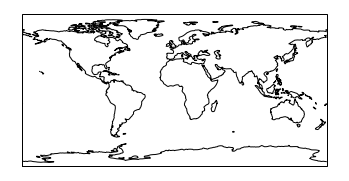

In [67]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
# set up a map
ax = plt.axes(projection=ccrs.PlateCarree())
#plt.plot([0], [0], '.', transform=ccrs.PlateCarree(),color='red')
#plt.plot([10], [10], '.', transform=ccrs.PlateCarree(),color='red')
ax.coastlines()
# Save the plot by calling plt.savefig() BEFORE plt.show()
# plt.savefig('coastlines.pdf')
# plt.savefig('coastlines.png')
plt.show()

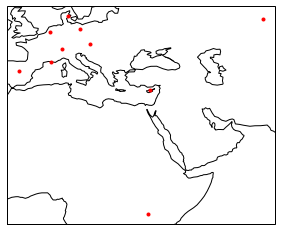

In [187]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
# set up a map
ax = plt.axes(projection=ccrs.PlateCarree())
plt.plot(latitude, long, '.', transform=ccrs.PlateCarree(),color='red')
plt.plot([latitude] ,[long],
         color='black', linestyle='-',
         transform=ccrs.PlateCarree(),
         )
ax.coastlines()
# Save the plot by calling plt.savefig() BEFORE plt.show()
# plt.savefig('coastlines.pdf')
# plt.savefig('coastlines.png')
plt.show()

In [0]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy